In [1]:
import boto3
import pandas as pd
import os
import matplotlib.pyplot as plt
import io
import numpy as np

s3_client = boto3.client('s3')
keys = {
    'PCD Lower Hutt wet weather flow': 'Canvas/default-20240711t130962/Inference/b125db45-198e-4257-b96a-f3afe410b634/prediction/b125db45-198e-4257-b96a-f3afe410b634_prediction.csv',
    'PCD Upper Hutt wet weather flow': 'Canvas/default-20240711t130962/Inference/5304df8a-aac3-41a5-83c6-d8037e5ee2aa/prediction/5304df8a-aac3-41a5-83c6-d8037e5ee2aa_prediction.csv',
    'PCD Stokes Valley wet weather flow': 'Canvas/default-20240711t130962/Inference/cd97b7ac-2049-4b65-8df4-6e3af693c557/prediction/cd97b7ac-2049-4b65-8df4-6e3af693c557_prediction.csv'
}
obs = {
    'PCD Lower Hutt wet weather flow': 'PCD_Lower_Hutt_wet_weather_flow_birch_lane.csv',
    'PCD Upper Hutt wet weather flow': 'PCD_Upper_Hutt_wet_weather_flow_pine_haven.csv',
    'PCD Stokes Valley wet weather flow': 'PCD_Stokes_Valley_wet_weather_flow_birch_lane.csv'
}

/tmp/ipykernel_116/2894808996.py:9: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_obs = pd.read_csv(obs_file)


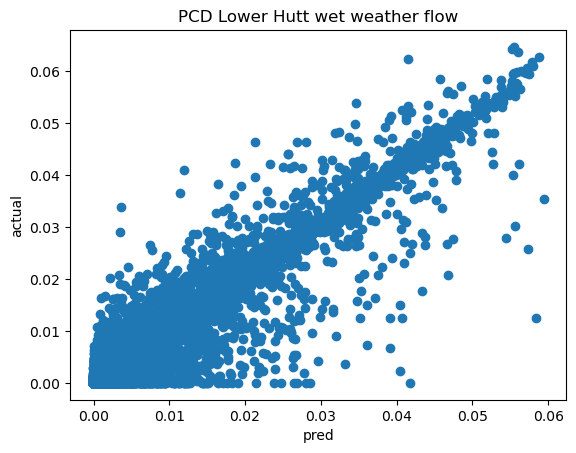

/tmp/ipykernel_116/2894808996.py:9: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_obs = pd.read_csv(obs_file)


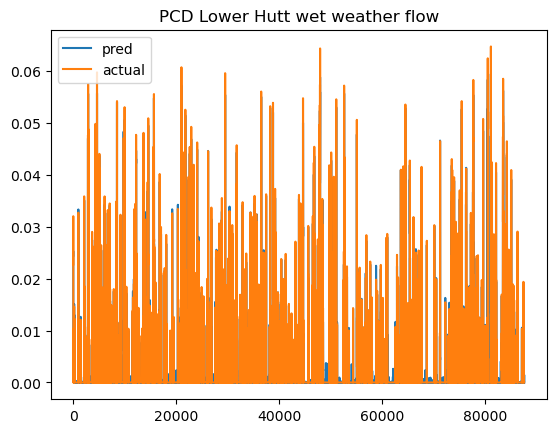

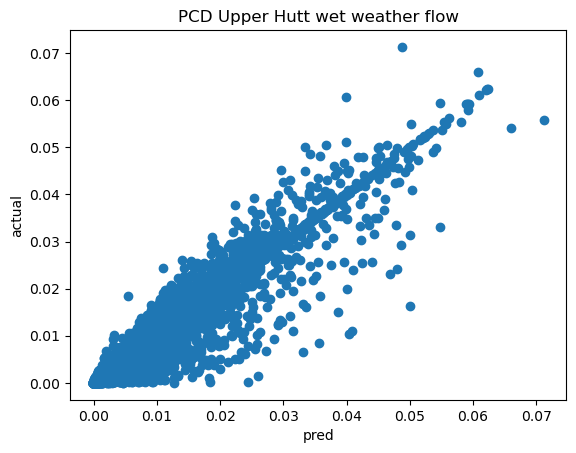

/tmp/ipykernel_116/2894808996.py:9: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_obs = pd.read_csv(obs_file)


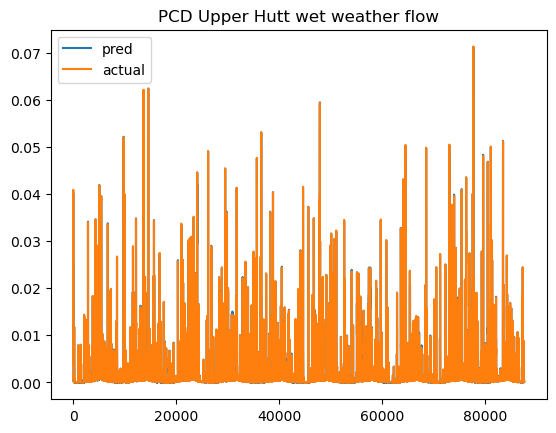

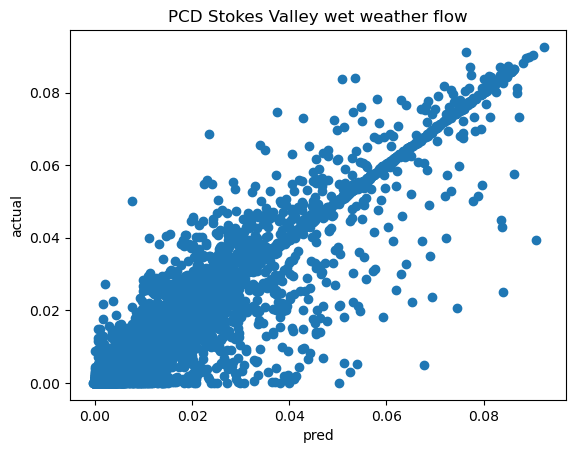

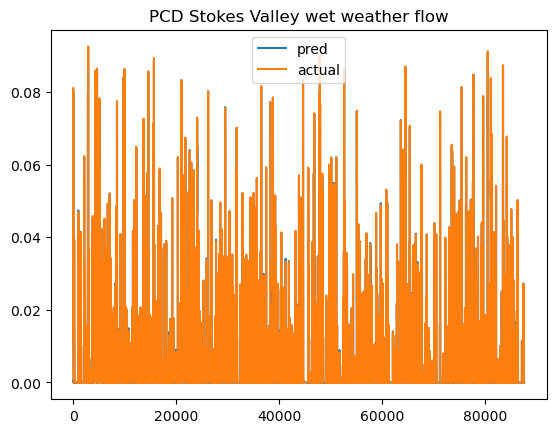

In [2]:
for target, key in keys.items():
    csv_obj = s3_client.get_object(
        Bucket='sagemaker-ap-southeast-2-851725470721', 
        Key=key
    )
    csv_content = csv_obj['Body'].read().decode('utf-8')
    df = pd.read_csv(io.StringIO(csv_content))
    obs_file = obs[target]
    df_obs = pd.read_csv(obs_file)
    df = df.rename(columns={target: 'pred'}).join(
    df_obs.rename(columns={target: 'actual'}))
    # plot
    plt.figure()
    plt.scatter(df['pred'], df['actual'])
    plt.ylabel('actual')
    plt.xlabel('pred')
    plt.title(target)
    plt.show()
    # convert negative values to 0
    df['pred'] = np.where(df['pred']< 0, 0, df['pred'])
    df[['pred', 'actual']].plot(title=target)
    df.to_csv(f'{target.replace(" ", "")}_corrected_pred.csv', index=False)

In [35]:
df, df_obs, target

(       PCD Stokes Valley wet weather flow
 0                                0.012238
 1                                0.076511
 2                                0.077603
 3                                0.076124
 4                                0.072830
 ...                                   ...
 87595                            0.000010
 87596                            0.000014
 87597                            0.000016
 87598                            0.000036
 87599                            0.001726
 
 [87600 rows x 1 columns],
                       Time  PCD Stokes Valley wet weather flow  Rainfall  \
 0      2008-01-01 00:00:00                            0.010211       0.0   
 1      2008-01-01 01:00:00                            0.077021       0.0   
 2      2008-01-01 02:00:00                            0.081160       0.0   
 3      2008-01-01 03:00:00                            0.077635       0.0   
 4      2008-01-01 04:00:00                            0.073615       